# Descripción del ejercicio:
##  Sobreventa de tiquetes aéreos considerando diferentes categorías de tarifas

#### Importando la librería creada

In [8]:
from Libreria.PyRisk import *
import statistics

#### Creando función para recrear la distribución "pert"

In [9]:
def pert(a, b, c, *, size=1, lamb=4):
    r = c - a
    alpha = 1 + lamb * (b - a) / r
    beta = 1 + lamb * (c - b) / r
    return a + np.random.beta(alpha, beta, size=size) * r

In [10]:
def varibles_entrada():

    return {"sillas_disponibles":150,
            "precio_competencia_tarifa":np.random.normal(loc=180,scale=55),
            "precio_tiquete_tarifa":195,
            "porcentaje_ausencias_tarifa":np.random.normal(loc=0.2 ,scale=0.03),
            "demanda_reservaciones_tarifa":np.round(pert(23,55,118),0),
            "precio_competencia_descontada":np.random.normal(loc=80 ,scale=28),
            "precio_tiquete_descontada":85,
            "porcentaje_ausencias_descontada":np.random.normal(loc=0.1 ,scale=0.01),
            "demanda_reservaciones_descontada":pert(80,140,210),
            "sillas_ofrecidas_venta":np.random.randint(150,236),
            "porcentaje_venta_tarifa":np.random.randint(20,100),
            "costo_unitario_pas_tierra":statistics._normal_dist_inv_cdf(random.random(),170,30)}

In [11]:
def sobreventa_tiquetes(sillas_disponibles,precio_competencia_tarifa,precio_tiquete_tarifa,porcentaje_ausencias_tarifa,demanda_reservaciones_tarifa,precio_competencia_descontada,precio_tiquete_descontada,porcentaje_ausencias_descontada,demanda_reservaciones_descontada,sillas_ofrecidas_venta,porcentaje_venta_tarifa,costo_unitario_pas_tierra):

    porcentaje_venta_descontada=1-porcentaje_venta_tarifa
    sillas_potenciales_tarifa=np.round(porcentaje_venta_tarifa*sillas_ofrecidas_venta,0)
    sillas_potenciales_descontada=np.round(sillas_ofrecidas_venta*sillas_potenciales_tarifa,0)
    sillas_tarifa_venden = np.round(min(demanda_reservaciones_tarifa,sillas_potenciales_tarifa),0)
    sillas_descontada_venden = np.round(min(demanda_reservaciones_descontada,sillas_potenciales_descontada), 0)
    pasajeros_abordar_tarifa = np.round((1-porcentaje_ausencias_tarifa)*sillas_tarifa_venden,0)
    pasajeros_abordar_descontada = np.round((1 - porcentaje_ausencias_descontada) * sillas_descontada_venden, 0)
    ingreso_venta=(sillas_tarifa_venden*precio_tiquete_tarifa)+(sillas_descontada_venden*precio_tiquete_descontada)-((sillas_tarifa_venden-pasajeros_abordar_tarifa)*precio_tiquete_tarifa)-((sillas_descontada_venden-pasajeros_abordar_descontada)*50)
    pasajeros_tierra=max((pasajeros_abordar_tarifa+pasajeros_abordar_descontada-sillas_disponibles),0)
    costo_dejar_pasajeros=pasajeros_tierra*costo_unitario_pas_tierra

    utilidad=ingreso_venta-costo_dejar_pasajeros

    return {"utilidad":float(utilidad),"costo_dejar_pasajeros":float(costo_dejar_pasajeros)}

In [12]:
sobreventa_tiquetes(**varibles_entrada())

{'utilidad': 17785.354843267818, 'costo_dejar_pasajeros': 2974.645156732181}

# Nombre parametros funciones

In [13]:
s1=Simulator(2,1000,sobreventa_tiquetes,varibles_entrada,0.95)

In [14]:
s1.run_simulation()

# pandas data frame

In [15]:
s1.get_simulations()

[{'simulacion': 0,
  'iteracion': 0,
  'utilidad': 11140.388599735132,
  'costo_dejar_pasajeros': 10999.611400264868},
 {'simulacion': 0,
  'iteracion': 1,
  'utilidad': 16649.380941304815,
  'costo_dejar_pasajeros': 2495.619058695185},
 {'simulacion': 0,
  'iteracion': 2,
  'utilidad': 18760.0,
  'costo_dejar_pasajeros': 0.0},
 {'simulacion': 0,
  'iteracion': 3,
  'utilidad': 13670.363520498448,
  'costo_dejar_pasajeros': 12079.636479501552},
 {'simulacion': 0,
  'iteracion': 4,
  'utilidad': 14617.356020624087,
  'costo_dejar_pasajeros': 5667.643979375914},
 {'simulacion': 0,
  'iteracion': 5,
  'utilidad': 13572.181567638687,
  'costo_dejar_pasajeros': 7862.818432361312},
 {'simulacion': 0,
  'iteracion': 6,
  'utilidad': 9715.132540694387,
  'costo_dejar_pasajeros': 14114.867459305613},
 {'simulacion': 0,
  'iteracion': 7,
  'utilidad': 15705.0,
  'costo_dejar_pasajeros': 0.0},
 {'simulacion': 0,
  'iteracion': 8,
  'utilidad': 16316.281799945955,
  'costo_dejar_pasajeros': 6843.7

In [21]:
s1.summary_table()

,simulacion,variable,Mínimo,Máximo,Media,Desviación est,Varianza,Asimetría,Curtosis,Moda,Mediana,IC,Q1,Q2,Q3,IQR
0,0,costo_dejar_pasajeros,0.000000,19582.916946,4851.220409,4190.334799,1.755891e+07,0.722113,-0.116511,0.0,4227.444768,"(4591.190500188071, 5111.250317513626)",1013.241239,4227.444768,7601.163733,6587.922494
1,0,utilidad,7487.083054,21537.383344,15999.404591,2015.731635,4.063174e+06,-0.334342,0.261668,15020.0,16083.587348,"(15874.318998208566, 16124.490184089738)",14715.471598,16083.587348,17376.096024,2660.624426
2,1,costo_dejar_pasajeros,0.000000,25016.929919,4463.861760,3897.902543,1.519364e+07,0.789302,0.438876,0.0,3842.637022,"(4221.978643287066, 4705.74487724436)",938.609670,3842.637022,7095.770784,6157.161115
3,1,utilidad,4458.070081,22501.568221,16029.983240,1984.094350,3.936630e+06,-0.644643,1.508344,15820.0,16165.000000,"(15906.860888576899, 16153.105590891679)",14980.025501,16165.000000,17370.085244,2390.059743


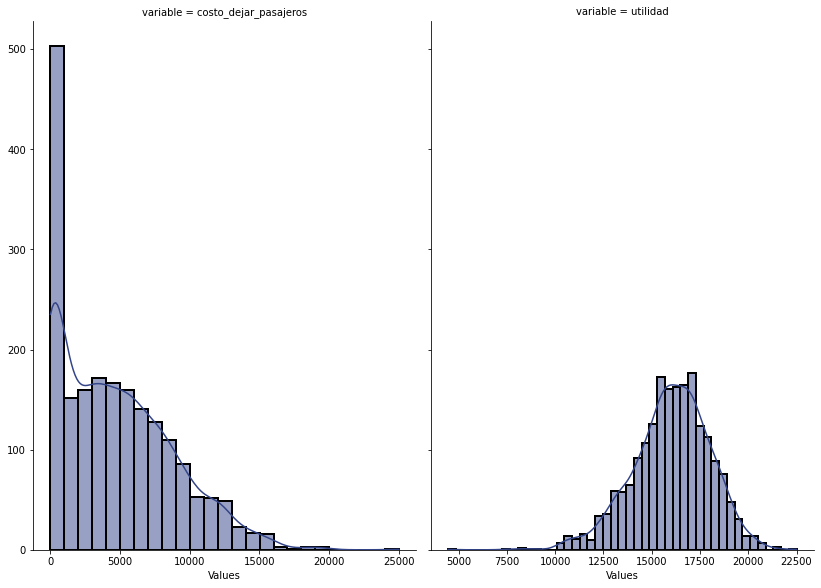

In [18]:
s1.histogram()

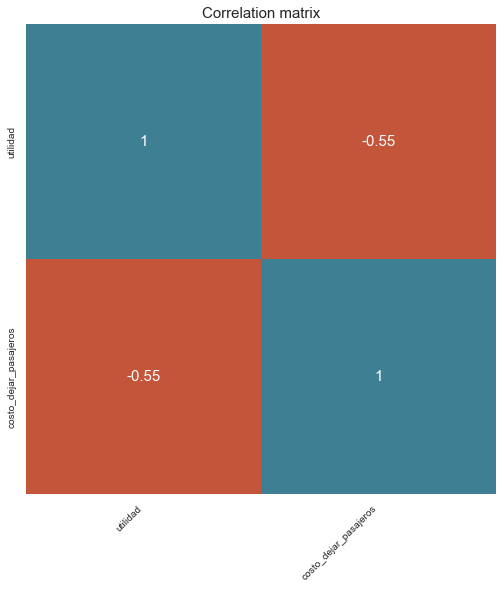

In [19]:
s1.plot_matrix(plot_type='corr_plot',columns=False,method='pearson')

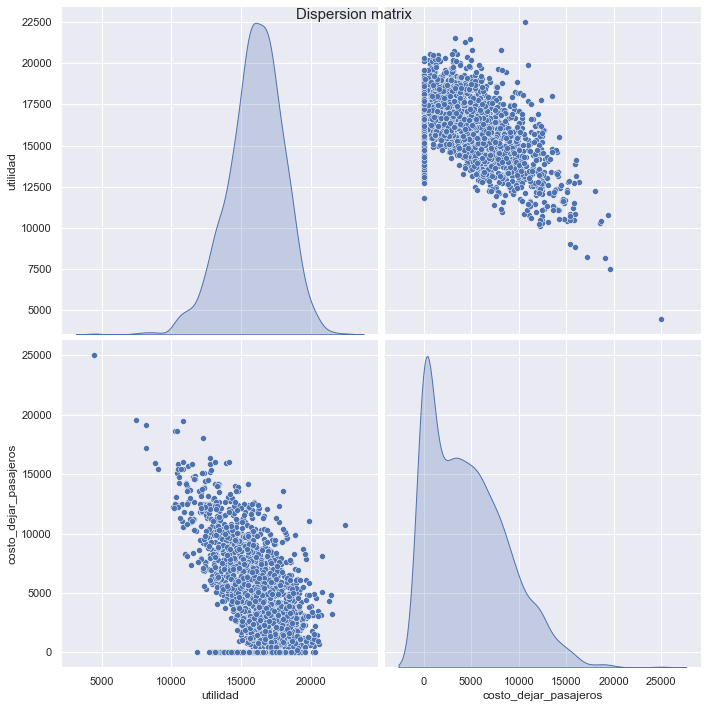

In [20]:
s1.plot_matrix(plot_type='pairplot',columns=False,method='pearson')